In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob

In [18]:
forms_results = pd.read_excel('../data/01.raw/resultados_forms.xlsx').sort_values(by='date', ascending=True)
forms_results.head(5)

,date,"No geral, como você está se sentindo?",Quão satisfeito está com o seu aprendizado?,Eu consigo fazer e ver meu trabalho entregando valor para o grupo?,Eu sinto que estou me realizando no trabalho?,Sinto que estou me desenvolvendo?,Você tem conseguido manter os seus objetivos pessoais?,Você pode prever a sua rotina de trabalho e suas oscilações?,Quanto de valor estamos entregando para o negócio?,"Neste momento, a abordagem de trabalho é sustentável para você?",Consigo cumprir planos pessoais fora do ambiente de trabalho?
0,2023-01-01,2,2,4,2,1,4,3,2,1,3
1,2023-01-02,3,3,3,3,2,4,1,1,3,4
2,2023-01-03,1,3,4,4,2,4,3,3,1,4
3,2023-01-04,1,3,4,2,1,1,3,1,1,4
4,2023-01-05,2,1,3,3,4,1,1,3,1,3


In [19]:
forms_results['controle_sobre_tempo'] = (
    forms_results['Você tem conseguido manter os seus objetivos pessoais?'] +
    forms_results['Você pode prever a sua rotina de trabalho e suas oscilações?    '] +
    forms_results['Consigo cumprir planos pessoais fora do ambiente de trabalho?'] +
    forms_results['Neste momento, a abordagem de trabalho é sustentável para você?    ']
)/4

forms_results['impacto_realizacao_pessoal'] = (
    forms_results['No geral, como você está se sentindo?'] +
    forms_results['Quão satisfeito está com o seu aprendizado?'] +
    forms_results['Eu consigo fazer e ver meu trabalho entregando valor para o grupo?'] +
    forms_results['Eu sinto que estou me realizando no trabalho?'] +
    forms_results['Quanto de valor estamos entregando para o negócio?'] +
    forms_results['Sinto que estou me desenvolvendo?']
)/6


forms_results

,date,"No geral, como você está se sentindo?",Quão satisfeito está com o seu aprendizado?,Eu consigo fazer e ver meu trabalho entregando valor para o grupo?,Eu sinto que estou me realizando no trabalho?,Sinto que estou me desenvolvendo?,Você tem conseguido manter os seus objetivos pessoais?,Você pode prever a sua rotina de trabalho e suas oscilações?,Quanto de valor estamos entregando para o negócio?,"Neste momento, a abordagem de trabalho é sustentável para você?",Consigo cumprir planos pessoais fora do ambiente de trabalho?,controle_sobre_tempo,impacto_realizacao_pessoal
0,2023-01-01,2,2,4,2,1,4,3,2,1,3,2.75,2.166667
1,2023-01-02,3,3,3,3,2,4,1,1,3,4,3.00,2.500000
2,2023-01-03,1,3,4,4,2,4,3,3,1,4,3.00,2.833333
3,2023-01-04,1,3,4,2,1,1,3,1,1,4,2.25,2.000000
4,2023-01-05,2,1,3,3,4,1,1,3,1,3,1.50,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,2024-07-27,4,2,2,4,3,1,2,2,1,1,1.25,2.833333
574,2024-07-28,2,2,4,3,4,1,1,1,1,3,1.50,2.666667
575,2024-07-29,4,2,4,3,3,2,3,2,1,2,2.00,3.000000
576,2024-07-30,3,2,4,3,3,3,1,2,2,1,1.75,2.833333


In [22]:
forms_results['ano'] = forms_results.date.dt.year 
forms_results['ano'] = forms_results.ano.astype(str)
forms_results['month'] =  forms_results.date.dt.month
forms_results['month_name'] =  forms_results.date.dt.month_name()
forms_results['ano_mes'] =  forms_results.ano + '-' + forms_results.month_name

forms_results.head(5)

,date,"No geral, como você está se sentindo?",Quão satisfeito está com o seu aprendizado?,Eu consigo fazer e ver meu trabalho entregando valor para o grupo?,Eu sinto que estou me realizando no trabalho?,Sinto que estou me desenvolvendo?,Você tem conseguido manter os seus objetivos pessoais?,Você pode prever a sua rotina de trabalho e suas oscilações?,Quanto de valor estamos entregando para o negócio?,"Neste momento, a abordagem de trabalho é sustentável para você?",Consigo cumprir planos pessoais fora do ambiente de trabalho?,controle_sobre_tempo,impacto_realizacao_pessoal,ano,month_name,ano_mes,month
0,2023-01-01,2,2,4,2,1,4,3,2,1,3,2.75,2.166667,2023,January,2023-January,1
1,2023-01-02,3,3,3,3,2,4,1,1,3,4,3.00,2.500000,2023,January,2023-January,1
2,2023-01-03,1,3,4,4,2,4,3,3,1,4,3.00,2.833333,2023,January,2023-January,1
3,2023-01-04,1,3,4,2,1,1,3,1,1,4,2.25,2.000000,2023,January,2023-January,1
4,2023-01-05,2,1,3,3,4,1,1,3,1,3,1.50,2.666667,2023,January,2023-January,1


In [23]:
forms_monthly = forms_results.groupby(['ano','month','ano_mes']).agg({
    'controle_sobre_tempo':'mean',
    'impacto_realizacao_pessoal':'mean'
}).reset_index()

forms_monthly

,ano,month,ano_mes,controle_sobre_tempo,impacto_realizacao_pessoal
0,2023,1,2023-January,2.370968,2.521505
1,2023,2,2023-February,2.571429,2.482143
2,2023,3,2023-March,2.790323,2.505376
3,2023,4,2023-April,2.266667,2.438889
4,2023,5,2023-May,2.677419,2.505376
5,2023,6,2023-June,2.450000,2.566667
6,2023,7,2023-July,2.314516,2.543011
7,2023,8,2023-August,2.596774,2.413978
8,2023,9,2023-September,2.516667,2.505556
9,2023,10,2023-October,2.451613,2.505376


C:\Users\PedroDiniz\AppData\Local\Temp\ipykernel_53620\3114821622.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\PedroDiniz\AppData\Local\Temp\ipykernel_53620\3114821622.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\PedroDiniz\AppData\Local\Temp\ipykernel_53620\3114821622.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\PedroDiniz\AppData\Local\Temp\ipykernel_53620\3114821622.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\PedroDiniz\AppD

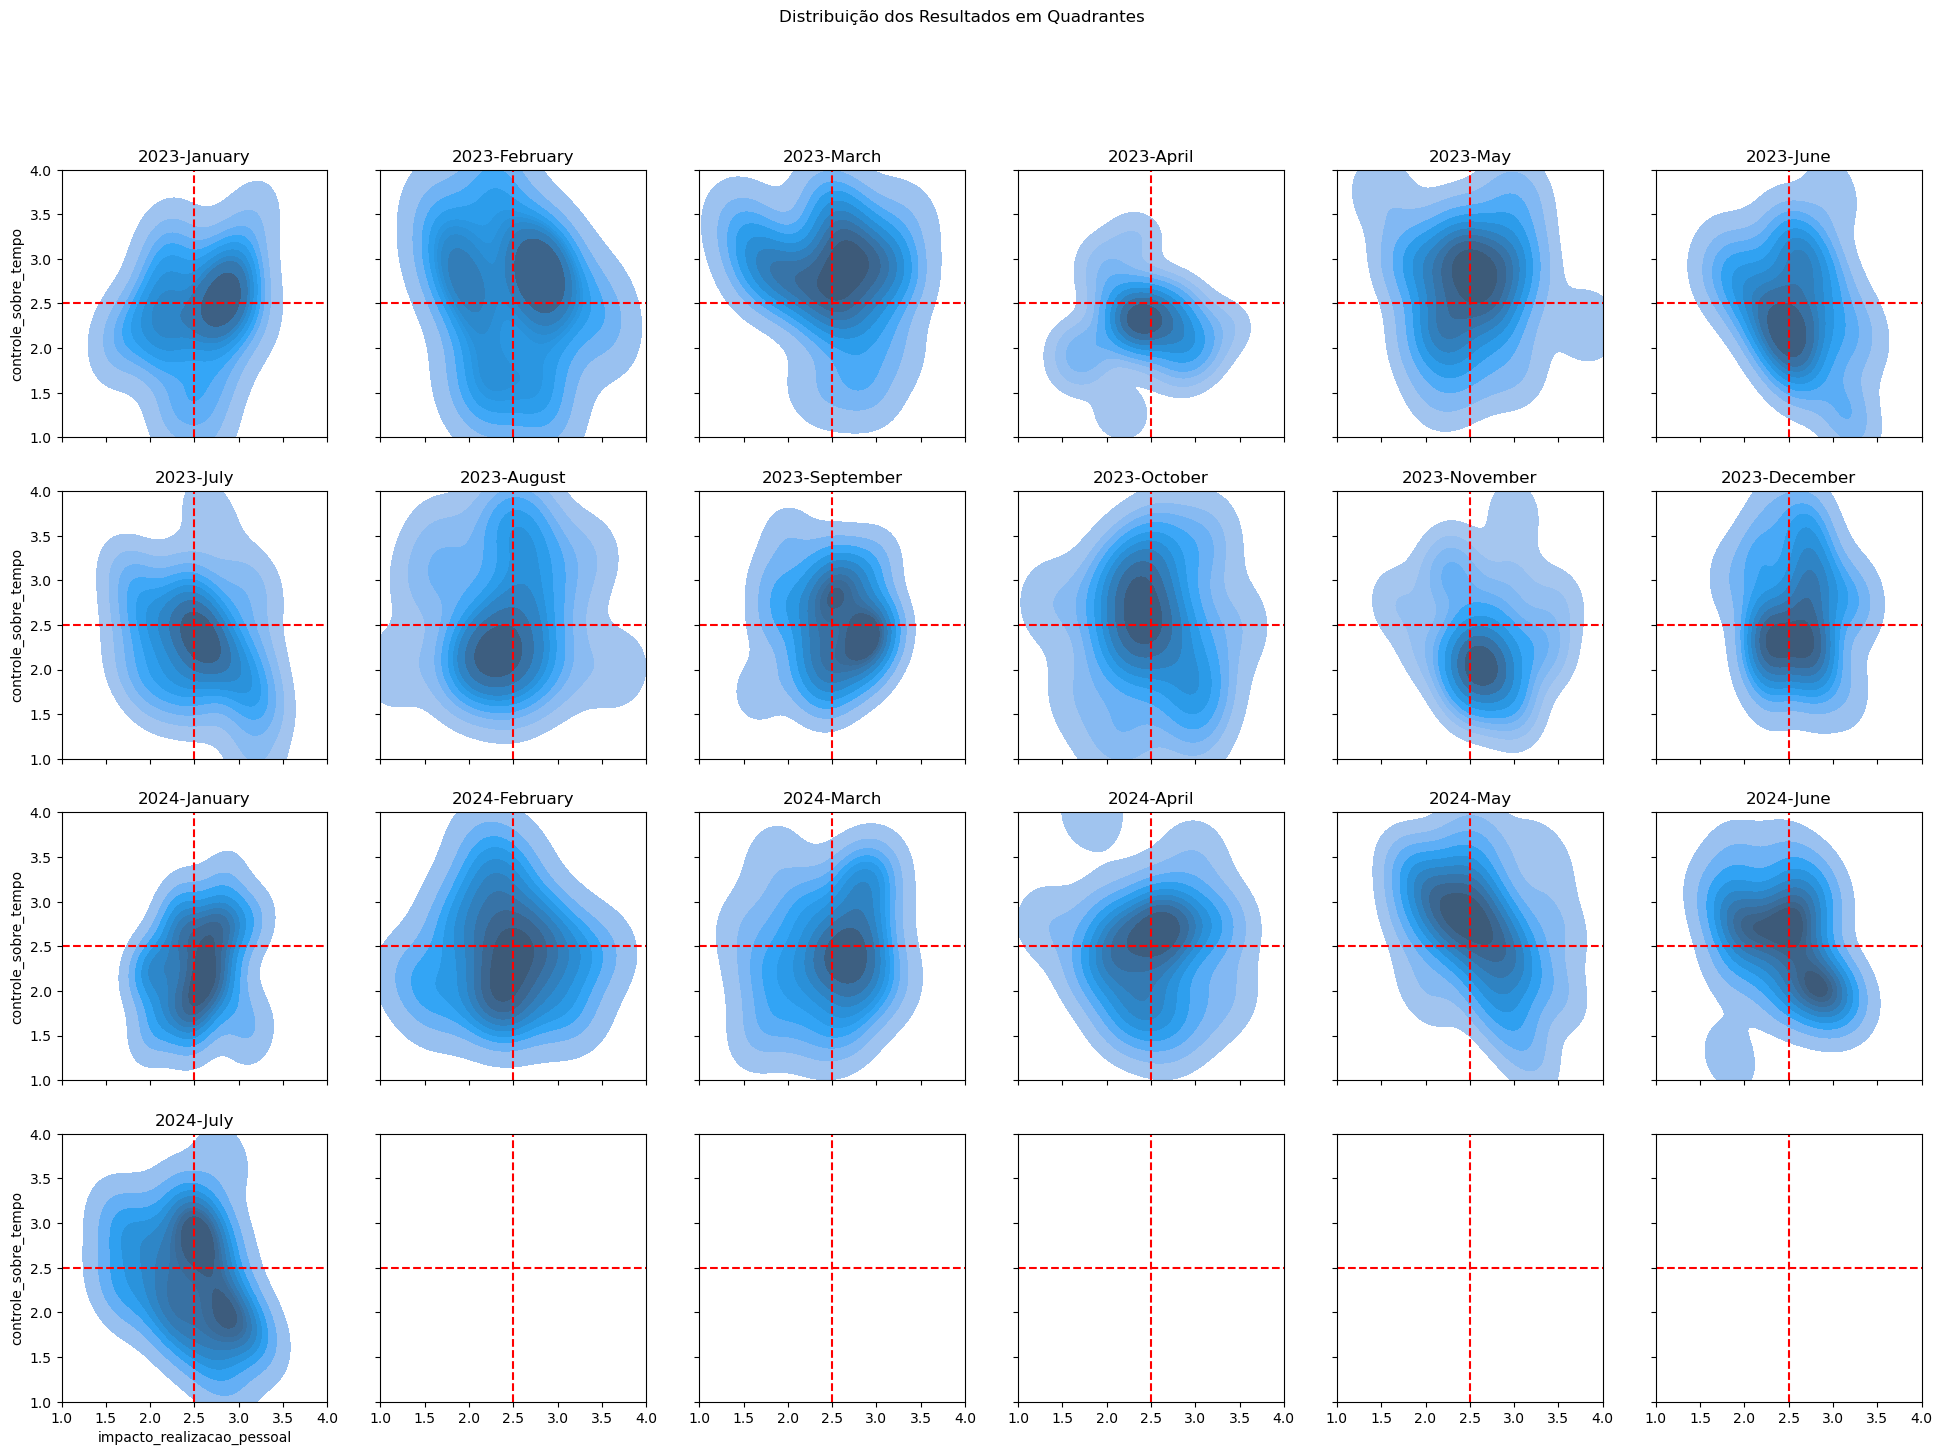

In [26]:
# lista de meses
meses = ['2023-January', '2023-February', '2023-March', '2023-April',
       '2023-May', '2023-June', '2023-July', '2023-August',
       '2023-September', '2023-October', '2023-November', '2023-December',
       '2024-January', '2024-February', '2024-March', '2024-April',
       '2024-May', '2024-June', '2024-July']
    
fig, axes = plt.subplots(4, 6, figsize=(24,16), sharex=True, sharey=True)


for ax in axes.flatten():
    ax.hlines(2.5, colors='red', xmin=1, xmax=4, linestyles='--')
    ax.vlines(2.5,colors='red', ymin=1, ymax=4, linestyles='--')

# plot de cada mês com base no índice do loop
for j in range(19):
    sns.kdeplot(
        x='impacto_realizacao_pessoal',
        y='controle_sobre_tempo',
        data=forms_results[forms_results.ano_mes == f'{meses[j]}'],
        shade=True,
        cbar=False,
        ax=axes[j//6, j%6]
        )
        
    # adicione o mês como título para cada subplot
    axes[j//6, j%6].set_title(meses[j])

        
plt.ylim(1,4)
plt.xlim(1,4)

plt.suptitle('Distribuição dos Resultados em Quadrantes')
    
plt.show()

In [27]:
# Export da base tratada
forms_results.to_csv('../data/02.intermediate/forms_results.csv', sep=';', decimal=',', index=False)